# This is due 6 Oct 2024

Risk_Factors.xlsx contains monthly observations of the risk-free rate and the three Fama–French risk factors (expressed as percentages), over the ten-year period from Jan 2004 through Dec 2013.

Regress the monthly excess returns for each industry portfolio on the three Fama–French risk factors:

Create a table showing the factor loadings on SMB and HML for the ten industry portfolios.
Using monthly excess returns for the ten industry portfolios, calculate the following performance metrics:

1.) Sharpe ratio
2.) Sortino ratio (using risk-free rate as target)
3.) Treynor ratio (using CAPM β)
4.) Jensen's α
5.) Fama–French three-factor α

Create a table showing the performance metrics for the ten industry portfolios.

Plot your results as a bar chart for each performance metric.

Briefly explain (in words, without mathematical equations or formulas) the economic significance and pricing implications of each of the three performance ratios (but not α's).


In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, scatter, plot, axis
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Datetime
import datetime as dt
from datetime import datetime
from datetime import timedelta

import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
Industry_Portfolio=pd.read_excel("Industry_Portfolios.xlsx",index_col=0)

In [4]:
Market_Portfolio=pd.read_excel("Market_Portfolio.xlsx",index_col=0)

In [5]:
Risk_Factors=pd.read_excel("Risk_Factors.xlsx",index_col=0)

In [6]:
Industry_Portfolio

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [7]:
Risk_Factors

,Rf,Rm-Rf,SMB,HML
Date,,,,
200401,0.07,2.15,2.67,1.55
200402,0.06,1.40,-1.17,0.45
200403,0.09,-1.32,1.84,0.07
200404,0.08,-1.83,-2.59,-1.67
200405,0.06,1.17,-0.10,-0.33
...,...,...,...,...
201308,0.00,-2.69,0.29,-2.46
201309,0.00,3.76,2.85,-1.59
201310,0.00,4.17,-1.56,1.31


In [8]:
Market_Portfolio

,Market
Date,
200401,2.22
200402,1.46
200403,-1.23
200404,-1.75
200405,1.23
...,...
201308,-2.69
201309,3.76
201310,4.17


In [9]:
for i in Industry_Portfolio.columns:
    Industry_Portfolio[str(i)] = Industry_Portfolio[i].subtract(Risk_Factors["Rf"], fill_value=0)

In [10]:
Industry_Portfolio

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,-0.01,-1.14,-0.69,0.37,4.46,1.34,0.38,3.02,1.85,2.81
200402,4.19,-0.13,1.89,4.63,-2.98,-0.58,6.03,0.83,2.01,2.10
200403,-0.18,-1.24,-0.36,-0.22,-2.64,-2.16,0.20,-4.05,1.04,-0.72
200404,1.34,2.22,-0.25,2.44,-4.99,-0.56,-2.78,3.46,-3.63,-3.84
200405,-1.95,-1.70,1.55,0.33,4.79,-3.01,0.24,-0.48,1.22,1.80
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [11]:
Merged_Portfolio = Industry_Portfolio.merge(Risk_Factors,how='inner',left_index=True, right_index=True)

In [12]:
Merged_Portfolio

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Rf,Rm-Rf,SMB,HML
Date,,,,,,,,,,,,,,
200401,-0.01,-1.14,-0.69,0.37,4.46,1.34,0.38,3.02,1.85,2.81,0.07,2.15,2.67,1.55
200402,4.19,-0.13,1.89,4.63,-2.98,-0.58,6.03,0.83,2.01,2.10,0.06,1.40,-1.17,0.45
200403,-0.18,-1.24,-0.36,-0.22,-2.64,-2.16,0.20,-4.05,1.04,-0.72,0.09,-1.32,1.84,0.07
200404,1.34,2.22,-0.25,2.44,-4.99,-0.56,-2.78,3.46,-3.63,-3.84,0.08,-1.83,-2.59,-1.67
200405,-1.95,-1.70,1.55,0.33,4.79,-3.01,0.24,-0.48,1.22,1.80,0.06,1.17,-0.10,-0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66,0.00,-2.69,0.29,-2.46
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83,0.00,3.76,2.85,-1.59
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87,0.00,4.17,-1.56,1.31


In [13]:
# Initialize the Market_model DataFrame with appropriate indices and columns
Market_model=pd.DataFrame(index=["Jensen Alpha","CAPM beta"],columns=Industry_Portfolio.columns)

# Loop through the first 10 columns of Merged_Portfolio (industry portfolios)
for column in range(Market_model.shape[1]):
    y = Merged_Portfolio.iloc[:, column]           # Dependent variable (industry portfolio)
    x = Merged_Portfolio[["Rm-Rf"]]                # Independent variables (Market)
    
    # Add a constant (intercept term) to the independent variables
    x = sm.add_constant(x)
    
    # Perform linear regression
    model = sm.OLS(y, x).fit()

    # Store the regression results in the Market_model DataFrame
    Market_model.iloc[0, column] = model.params['const']  # Intercept
    Market_model.iloc[1, column] = model.params['Rm-Rf']  # Market (Rm-Rf)

In [14]:
Market_model

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Jensen Alpha,0.369717,-0.417903,0.160494,0.504485,-0.064024,0.194348,0.274093,0.236968,0.446523,-0.387508
CAPM beta,0.653744,1.649374,1.167929,0.965527,1.132387,0.901721,0.829515,0.67589,0.537009,1.206992


In [15]:
# Initialize the Fama_French_model DataFrame with appropriate indices and columns
Fama_French_model=pd.DataFrame(index=["Intercept","Market","SMB","HML"],columns=Industry_Portfolio.columns)

# Loop through the first 10 columns of Merged_Portfolio (industry portfolios)
for column in range(Fama_French_model.shape[1]):
    y = Merged_Portfolio.iloc[:, column]           # Dependent variable (industry portfolio)
    x = Merged_Portfolio[["Rm-Rf", "SMB", "HML"]]  # Independent variables (Market, SMB, HML)
    
    # Add a constant (intercept term) to the independent variables
    x = sm.add_constant(x)
    
    # Perform linear regression
    model = sm.OLS(y, x).fit()

    # Store the regression results in the Fama_French_model DataFrame
    Fama_French_model.iloc[0, column] = model.params['const']  # Intercept
    Fama_French_model.iloc[1, column] = model.params['Rm-Rf']  # Market (Rm-Rf)
    Fama_French_model.iloc[2, column] = model.params['SMB']    # SMB
    Fama_French_model.iloc[3, column] = model.params['HML']    # HML

In [16]:
Fama_French_model

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Intercept,0.386704,-0.474342,0.153285,0.523007,-0.065979,0.200724,0.255941,0.257472,0.474411,-0.404412
Market,0.712134,1.447452,1.142282,1.028354,1.152803,0.924137,0.770227,0.751976,0.631827,1.123473
SMB,-0.229102,0.670878,0.087388,-0.25936,0.335674,-0.080299,0.280191,-0.212655,-0.387961,-0.061676
HML,-0.023342,0.240949,0.027727,-0.008158,-0.556947,-0.019063,-0.03908,-0.143765,-0.016881,0.547325


In [17]:
Sharpe_df=pd.DataFrame(index=["Sharpe"],columns=Industry_Portfolio.columns)

for column in range(Sharpe_df.shape[1]):
    Risk_Premium = Industry_Portfolio.iloc[:, column].mean()          
    Standard_Deviation = Industry_Portfolio.iloc[:, column].std() 
    Sharpe_ratio=Risk_Premium/Standard_Deviation
    Sharpe_df.iloc[0,column]=Sharpe_ratio
    
# Note: If Information ratio target is rf then it is the same as Sharpe ratio

In [18]:
Sharpe_df

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Sharpe,0.231099,0.072356,0.166616,0.181708,0.118552,0.169064,0.191753,0.172529,0.210948,0.064693


In [19]:
# Version 1

Sortino_df=pd.DataFrame(index=["Sortino"],columns=Industry_Portfolio.columns)

for column in range(Sortino_df.shape[1]):
    Risk_Premium = Industry_Portfolio.iloc[:, column].mean()          
    Negative_Standard_Deviation = Industry_Portfolio.iloc[:, column][Industry_Portfolio.iloc[:, column]<0].std()
    Sortino_ratio=Risk_Premium/Negative_Standard_Deviation
    Sortino_df.iloc[0,column]=Sortino_ratio

In [20]:
# Version 2

Sortino_df=pd.DataFrame(index=["Sortino"],columns=Industry_Portfolio.columns)

for column in range(Sortino_df.shape[1]):
    # Calculate Risk Premium (mean return)
    Risk_Premium = Industry_Portfolio.iloc[:, column].mean() 
    
    # Calculate downside risk
    Returns = Industry_Portfolio.iloc[:, column]  # Extract the returns for the column
    downside_risk = np.where(Returns < 0, Returns ** 2, 0)  # Squared negative returns
    
    # Calculate Negative Standard Deviation (downside risk)
    Negative_Standard_Deviation = np.sqrt(np.mean(downside_risk))
    
    # Calculate Sortino Ratio
    if Negative_Standard_Deviation != 0:
        Sortino_ratio = Risk_Premium / Negative_Standard_Deviation     
    else:
        Sortino_ratio = None
    
    Sortino_df.iloc[0,column]=Sortino_ratio

The two pieces of code give different results due to the way the downside risk (negative standard deviation) is calculated. Specifically, the difference lies in how the standard deviation of negative returns is computed:

#### Summary of Differences:

First Code (Standard Deviation):
It uses the sample standard deviation of the negative returns (with Bessel's correction, dividing by n−1).
This results in a slightly higher value for small datasets due to the sample correction.

Second Code (Root-Mean-Square Method):
It calculates the population downside deviation, which tends to give a slightly lower estimate because it uses n instead of n−1 and squares the returns before averaging.

#### Key Points:

Sample vs Population: The first code uses sample standard deviation, while the second code calculates the population equivalent using RMS.

Squaring Returns: The second code squares the negative returns before averaging, which amplifies extreme negative values more than the first method.

Bessel's Correction: The first method adjusts for sample size by using n−1, while the second method divides by n, leading to a minor difference in the result, especially for small datasets.

#### Which is More Appropriate?

If you're calculating the downside risk in a way that's consistent with the Sortino ratio, the second approach (using the square root of the mean of squared negative returns) is typically more in line with the traditional Sortino ratio calculation.

The first method is more of a volatility measure applied only to negative returns, which is a more general approach but less specific to how downside risk is often defined in finance.

Both approaches can be correct depending on how you define downside risk, but if you're following traditional financial conventions for Sortino, the second method (RMS) is closer to the formal definition of downside deviation.

In [21]:
Sortino_df

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Sortino,0.350804,0.111967,0.24126,0.273612,0.17062,0.24494,0.293032,0.270294,0.290044,0.087351


In [22]:
Treynor_df=pd.DataFrame(index=["Treynor"],columns=Industry_Portfolio.columns)

for column in range(Treynor_df.shape[1]):
    column_name=Treynor_df.columns[column]
    Risk_Premium = Industry_Portfolio.iloc[:, column].mean()          
    Beta=Market_model.loc["CAPM beta",column_name]
    Treynor_ratio=Risk_Premium/Beta
    Treynor_df.iloc[0,column]=Treynor_ratio

In [23]:
Treynor_df

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Treynor,1.186372,0.367463,0.758251,1.14333,0.564295,0.836363,0.951258,0.971435,1.452334,0.299781


In [24]:
Jensen_Alpha_df=pd.DataFrame(index=["Jensen_Alpha"],columns=Industry_Portfolio.columns)
Jensen_Alpha_df.iloc[0,:]=Market_model.loc["Jensen Alpha",:]

In [25]:
Jensen_Alpha_df

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Jensen_Alpha,0.369717,-0.417903,0.160494,0.504485,-0.064024,0.194348,0.274093,0.236968,0.446523,-0.387508


In [26]:
Fama_French_Alpha_df=pd.DataFrame(index=["Fama_French_Alpha"],columns=Industry_Portfolio.columns)
Fama_French_Alpha_df.iloc[0,:]=Fama_French_model.loc["Intercept",:]

In [27]:
Fama_French_Alpha_df

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Fama_French_Alpha,0.386704,-0.474342,0.153285,0.523007,-0.065979,0.200724,0.255941,0.257472,0.474411,-0.404412


In [28]:
Performance_Measures=pd.concat([Sharpe_df,Sortino_df,Treynor_df,Jensen_Alpha_df,Fama_French_Alpha_df])
Performance_Measures=Performance_Measures.T

In [29]:
Performance_Measures

,Sharpe,Sortino,Treynor,Jensen_Alpha,Fama_French_Alpha
NoDur,0.231099,0.350804,1.186372,0.369717,0.386704
Durbl,0.072356,0.111967,0.367463,-0.417903,-0.474342
Manuf,0.166616,0.24126,0.758251,0.160494,0.153285
Enrgy,0.181708,0.273612,1.14333,0.504485,0.523007
HiTec,0.118552,0.17062,0.564295,-0.064024,-0.065979
Telcm,0.169064,0.24494,0.836363,0.194348,0.200724
Shops,0.191753,0.293032,0.951258,0.274093,0.255941
Hlth,0.172529,0.270294,0.971435,0.236968,0.257472
Utils,0.210948,0.290044,1.452334,0.446523,0.474411
Other,0.064693,0.087351,0.299781,-0.387508,-0.404412


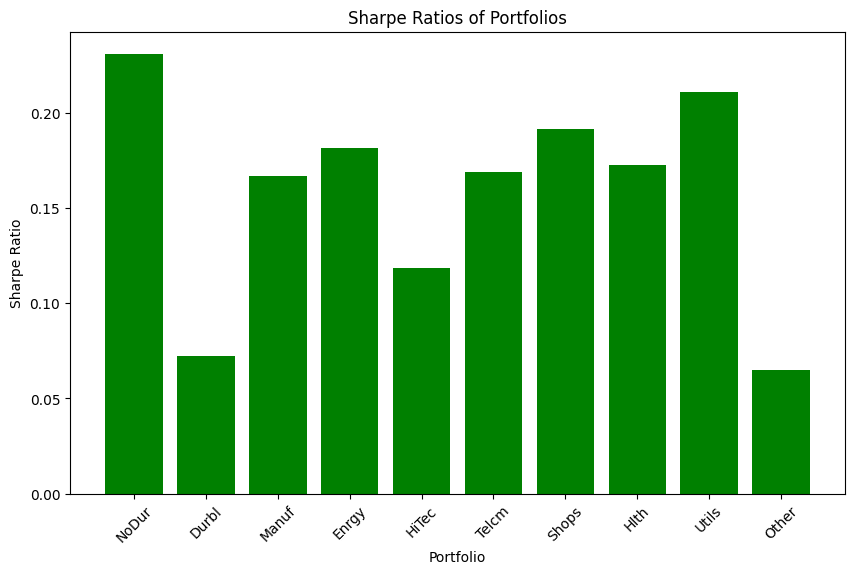

In [30]:
# Create a bar chart for the Sharpe ratios of each portfolio
plt.figure(figsize=(10,6))  
plt.bar(Performance_Measures.index, Performance_Measures["Sharpe"], color='green')

plt.title("Sharpe Ratios of Portfolios")
plt.xlabel("Portfolio")
plt.ylabel("Sharpe Ratio")

plt.xticks(rotation=45)  
plt.show()

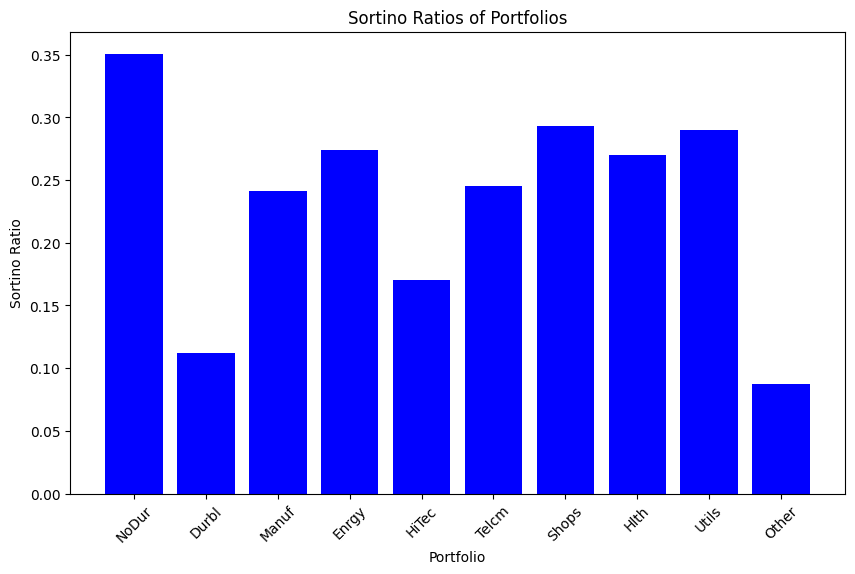

In [31]:
# Create a bar chart for the Sortino ratios of each portfolio
plt.figure(figsize=(10,6))  
plt.bar(Performance_Measures.index, Performance_Measures["Sortino"], color='blue')

plt.title("Sortino Ratios of Portfolios")
plt.xlabel("Portfolio")
plt.ylabel("Sortino Ratio")

plt.xticks(rotation=45)  
plt.show()

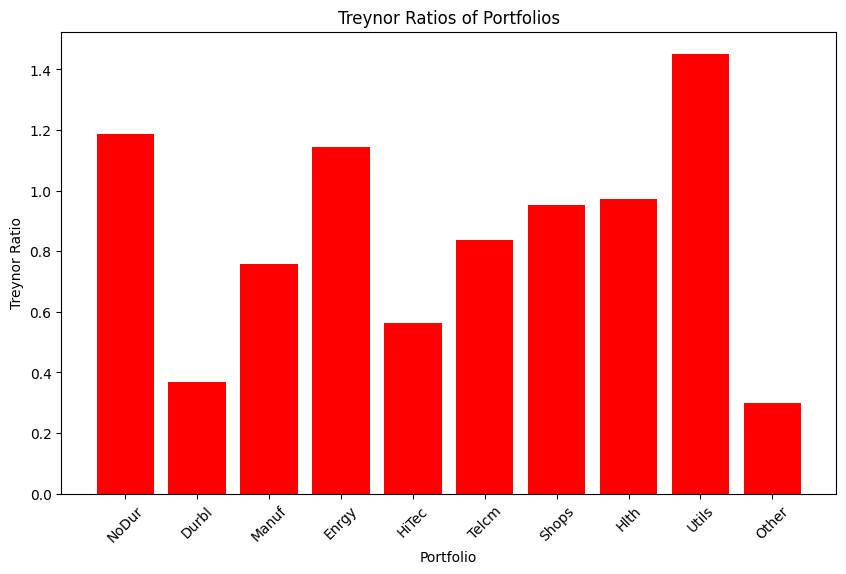

In [32]:
# Create a bar chart for the Treynor ratios of each portfolio
plt.figure(figsize=(10,6))  
plt.bar(Performance_Measures.index, Performance_Measures["Treynor"], color='red')

plt.title("Treynor Ratios of Portfolios")
plt.xlabel("Portfolio")
plt.ylabel("Treynor Ratio")

plt.xticks(rotation=45)  
plt.show()

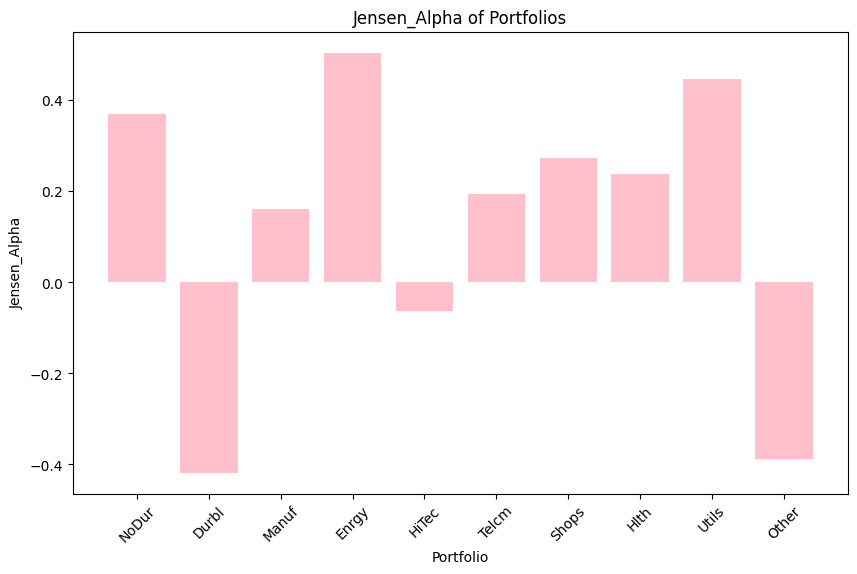

In [33]:
# Create a bar chart for the Jensen_Alpha of each portfolio
plt.figure(figsize=(10,6))  
plt.bar(Performance_Measures.index, Performance_Measures["Jensen_Alpha"], color='pink')

plt.title("Jensen_Alpha of Portfolios")
plt.xlabel("Portfolio")
plt.ylabel("Jensen_Alpha")

plt.xticks(rotation=45)  
plt.show()

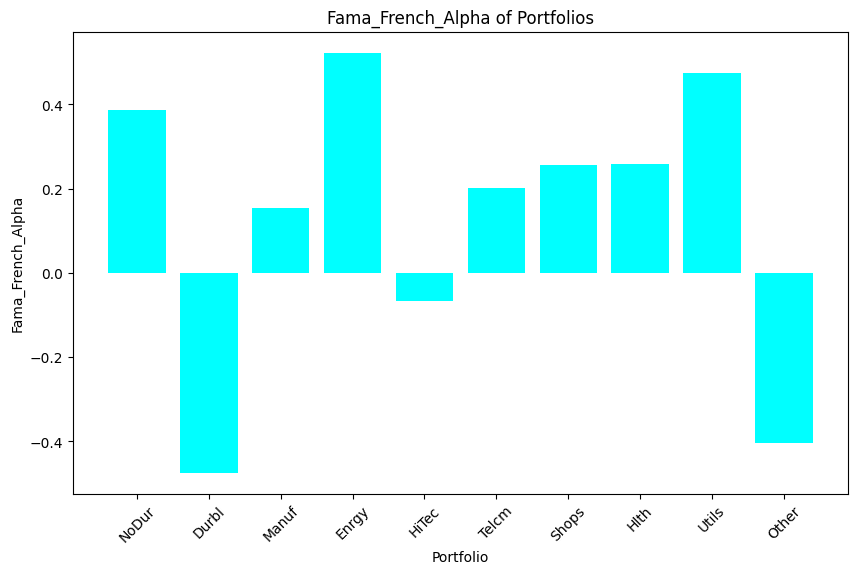

In [34]:
# Create a bar chart for the Fama_French_Alpha of each portfolio
plt.figure(figsize=(10,6))  
plt.bar(Performance_Measures.index, Performance_Measures["Fama_French_Alpha"], color='cyan')

plt.title("Fama_French_Alpha of Portfolios")
plt.xlabel("Portfolio")
plt.ylabel("Fama_French_Alpha")

plt.xticks(rotation=45)  
plt.show()

#### Economic significance and pricing implications of each of the three performance ratios 

The Sharpe ratio measures the risk premium per unit of standard deviation. Standard deviation captures total risk (both systematic and idiosyncatic risk), therefore Sharpe ratio is more appropriate for comparing well diversified portfolio with low/no idiosyncratic risk and less appropriate for comparing between individual investments and diversified portfolios. A drawback of using standard deviation as a measure of risk is that it assumes that returns are normally distributed, and thus is unable to distinguish between asymetric return distributions with the same variance but different skewness. When comparing 2 well-diversified portfolios, the portfolio with higher Sharpe ratio provides higher returns for every unit of volatility and is thus a more attractive portfolio.

Treynor ratio measures the risk premium per unit of market risk (beta). As beta only includes systematic (market) risk and ignores idiosyncratic risk, Treynor ratio can be used to compare the performance of individual investment to diversified portfolio. However, it does not take into account other types of systematic risk such as size or value, only considering market risk. A portfolio wiht higher Treynor ratio provides better risk premium for its exposure to market risk compared with portfolio with lower Treynor ratio. All portfolios on the SML should have the same Treynor ratio.

Sortino ratio measures the portfolio's expected deviation from the benchmark return, per unit of below-target semi-deviation. Below-target semi-deviation only considers risk that realised return on investment falls below the target return.As below-target semi-variance is a measure of downside risk, Sortino ratio is able to distinguish between asymmetric distributions with same variance but different skewness. As investors are more sensitive to downside volatility compared with upside volatility, Sortino ratio maybe more informative compared to the Sharpe ratio, especially when the return distribution is not normal. Returns with the same variance but different skewness would have the same Sharpe Ratio but different Sortino ratio.

# Second version

In [35]:
Industry_Portfolio = \
    pd \
        .read_excel('Industry_Portfolios.xlsx')

Risk_Factors = \
    pd \
        .read_excel('Risk_Factors.xlsx')

In [36]:
#get industry list
industry_list = \
    Industry_Portfolio \
        .columns \
            .to_list()

industry_list.remove('Date')

In [37]:
combined = \
    Industry_Portfolio \
        .merge(
            Risk_Factors,
            how = 'left',
            left_on = 'Date',
            right_on = 'Date'
            )

In [38]:
for industry in industry_list:
    # computing excess return
    combined[industry] = \
        combined[industry] - combined.Rf

In [39]:
Sharpe = \
    {
        'Industry' : [],
        'Sharpe Ratio' : [],
    }

for industry in industry_list:

    Sharpe['Industry'].append(industry)

    sharpe_calc = \
        combined[industry].mean() / combined[industry].std()
    
    Sharpe['Sharpe Ratio'].append(sharpe_calc)

Sharpe = \
    pd.DataFrame(Sharpe)

In [40]:
Sortino = \
    {
        'Industry' : [],
        'Sortino Ratio' : [],
    }

for industry in industry_list:

    industry_downside = combined[[industry]]

    # semi variance: if return - target return < 0 then square
    industry_downside['downside_risk'] = \
        np.where(
            industry_downside[industry] < 0,
            industry_downside[industry] ** 2,
            0
        )        
    
    # mean / sqrt(mean of below benchmark returns)
    sortino_ratio = industry_downside[industry].mean() / np.sqrt(industry_downside.downside_risk.mean())

    Sortino['Industry'].append(industry)

    Sortino['Sortino Ratio'].append(sortino_ratio)

Sortino = \
    pd.DataFrame(Sortino)

In [41]:
#create regression dictionary to append
variables = {
    'Industry' : [],
    'α' : [],
    'β' : [],
    'mean_ret' : []
    }

#market model X is excess market returns, Ri - Rf = a + b(rm - rf)
X = \
    combined['Rm-Rf']

X = sm.add_constant(X)

#loop each industry and run regression
for industry in industry_list:
    Y = \
        combined[industry]

    market_model = sm.OLS(Y,X)

    market_result = market_model.fit()

    variables['Industry'].append(industry)

    variables['α'].append(market_result.params[0]) # intercept

    variables['β'].append(market_result.params[1]) # slope

    variables['mean_ret'].append(combined[industry].mean())

variables = \
    pd \
        .DataFrame(variables)

variables['Treynor Ratio'] = \
    variables.mean_ret / variables.β

Treynor_Ratio = \
    variables[['Industry', 'Treynor Ratio']]

In [42]:
# take from treynor market model regression intercept
Jensen_α = \
    variables[['Industry', 'α']] \
    .rename(
        columns = {'α' : 'Jensen α'}
    )

In [43]:
three_factor = \
    {
        'Industry' : [],
        'three factor α' : []
    }

three_facter_x = \
    combined[
        ['Rm-Rf', 
         'SMB', 
         'HML']
        ]

three_facter_x = \
    sm \
        .add_constant(three_facter_x)

for industry in industry_list:

    three_facter_y = \
        combined[industry]
    
    three_facter_model = \
        sm.OLS(three_facter_y, three_facter_x)
    
    three_facter_result = three_facter_model.fit()
    
    three_facter_α = \
        three_facter_result.params[0]
    
    three_factor['Industry'].append(industry)

    three_factor['three factor α'].append(three_facter_α)


three_factor = \
    pd \
        .DataFrame(three_factor)

In [44]:
# gives beta for each factor
three_facter_result.params

const   -0.404412
Rm-Rf    1.123473
SMB     -0.061676
HML      0.547325
dtype: float64

In [45]:
performance_metrics = \
        Sharpe \
            .merge(
                Treynor_Ratio,
                how = 'inner',
                left_on = 'Industry',
                right_on = 'Industry'
            ) \
            .merge(
                Sortino,
                how = 'inner',
                left_on = 'Industry',
                right_on = 'Industry'
            ) \
            .merge(
                Jensen_α,
                how = 'inner',
                left_on = 'Industry',
                right_on = 'Industry'
            ) \
            .merge(
                three_factor,
                how = 'inner',
                left_on = 'Industry',
                right_on = 'Industry'
            )

performance_metrics

,Industry,Sharpe Ratio,Treynor Ratio,Sortino Ratio,Jensen α,three factor α
0,NoDur,0.231099,1.186372,0.350804,0.369717,0.386704
1,Durbl,0.072356,0.367463,0.111967,-0.417903,-0.474342
2,Manuf,0.166616,0.758251,0.241260,0.160494,0.153285
3,Enrgy,0.181708,1.143330,0.273612,0.504485,0.523007
4,HiTec,0.118552,0.564295,0.170620,-0.064024,-0.065979
5,Telcm,0.169064,0.836363,0.244940,0.194348,0.200724
6,Shops,0.191753,0.951258,0.293032,0.274093,0.255941
7,Hlth,0.172529,0.971435,0.270294,0.236968,0.257472
8,Utils,0.210948,1.452334,0.290044,0.446523,0.474411
9,Other,0.064693,0.299781,0.087351,-0.387508,-0.404412


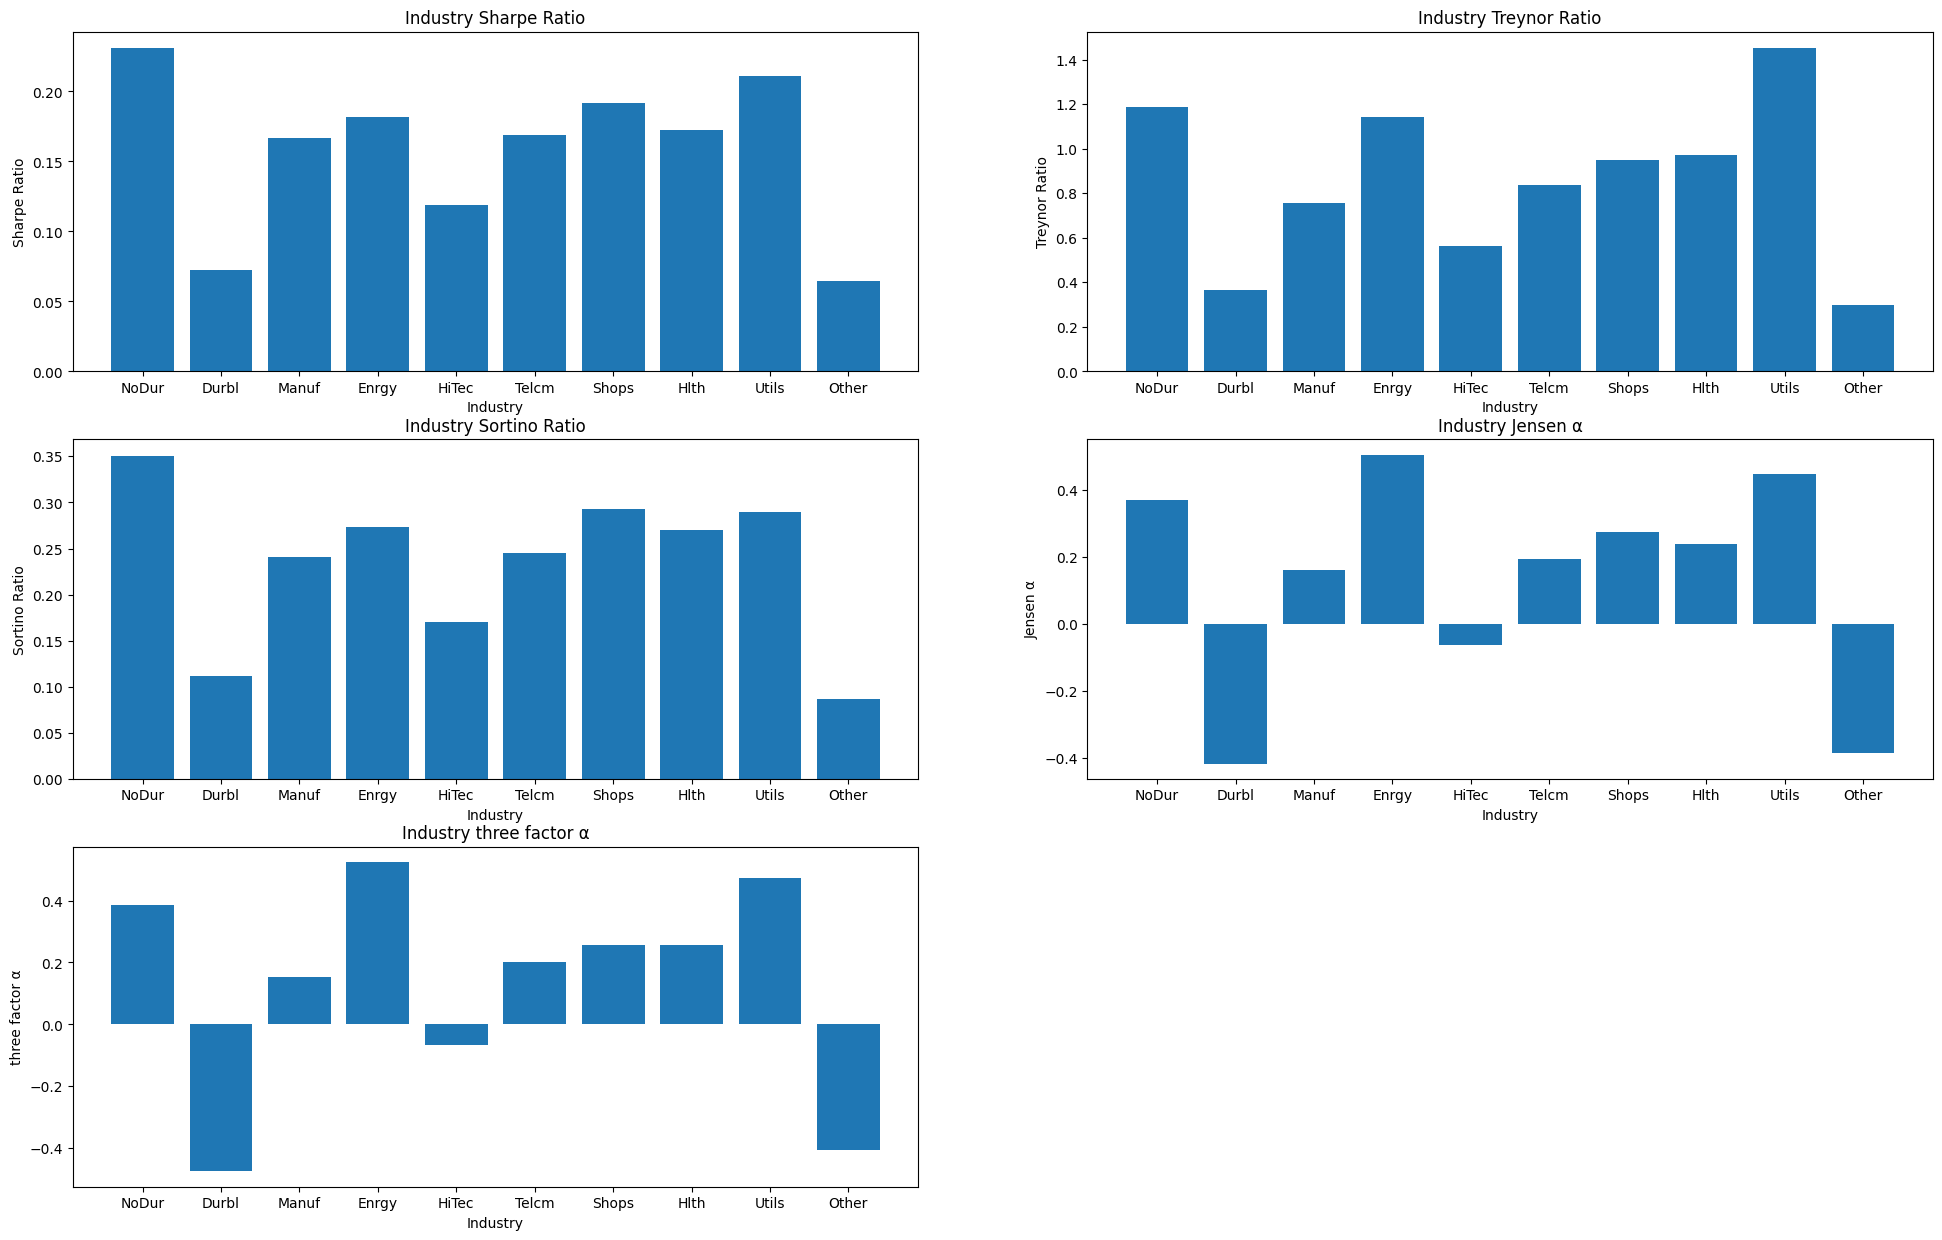

In [46]:
plt.figure(figsize=(24, 15))

metrics_list = performance_metrics.columns.to_list()
metrics_list.remove('Industry')

for metric in range(len(metrics_list)):

    subplot(3, 2, metric + 1)

    plt \
        .bar(performance_metrics['Industry'], 
            performance_metrics[metrics_list[metric]]
            )

    plt \
        .xlabel('Industry')

    plt \
        .ylabel(metrics_list[metric])

    plt \
        .title('Industry ' + metrics_list[metric])